In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Show all columns
pd.set_option('display.max_columns', None)

## Teams

- yearID         Year
- lgID           League
- teamID         Team
- franchID       Franchise (links to TeamsFranchise table)
- divID          Team's division
- Rank           Position in final standings
- G              Games played
- GHome          Games played at home
- W              Wins
- L              Losses
- DivWin         Division Winner (Y or N)
- WCWin          Wild Card Winner (Y or N)
- LgWin          League Champion(Y or N)
- WSWin          World Series Winner (Y or N)
- R              Runs scored
- AB             At bats
- H              Hits by batters
- 2B             Doubles
- 3B             Triples
- HR             Homeruns by batters
- BB             Walks by batters
- SO             Strikeouts by batters
- SB             Stolen bases
- CS             Caught stealing
- HBP            Batters hit by pitch
- SF             Sacrifice flies
- RA             Opponents runs scored
- ER             Earned runs allowed
- ERA            Earned run average
- CG             Complete games
- SHO            Shutouts
- SV             Saves
- IPOuts         Outs Pitched (innings pitched x 3)
- HA             Hits allowed
- HRA            Homeruns allowed
- BBA            Walks allowed
- SOA            Strikeouts by pitchers
- E              Errors
- DP             Double Plays
- FP             Fielding  percentage
- name           Team's full name
- park           Name of team's home ballpark
- attendance     Home attendance total
- BPF            Three-year park factor for batters
- PPF            Three-year park factor for pitchers
- teamIDBR       Team ID used by Baseball Reference website
- teamIDlahman45 Team ID used in Lahman database version 4.5
- teamIDretro    Team ID used by Retrosheet

In [121]:
# Read in the data
teams = pd.read_csv('data/Teams.csv')
# Import data for war
player = pd.read_csv('data/war_baseballreference.csv')
# Rename the player_id to playerID, year_ID to yearID, and team_id to teamID
player = player.rename(columns={'player_ID': 'playerID', "year_ID":"yearID",'team_ID': 'teamID'})

In [64]:
player.head()

,name,age,playerID,yearID,teamID,WAR_bat,WAR_pit,WAR_total
0,David Aardsma,22.0,aardsda01,2004,SFG,0.00,-0.15,-0.15
1,David Aardsma,24.0,aardsda01,2006,CHC,-0.04,0.61,0.57
2,David Aardsma,25.0,aardsda01,2007,CHW,0.00,-0.40,-0.40
3,David Aardsma,26.0,aardsda01,2008,BOS,-0.02,-0.31,-0.33
4,David Aardsma,27.0,aardsda01,2009,SEA,0.00,1.69,1.69


In [65]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60.0,19.0,73.0,16.0,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60.0,22.0,69.0,21.0,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26.0,25.0,18.0,8.0,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33.0,9.0,16.0,4.0,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33.0,15.0,46.0,15.0,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [136]:
def agg_player_to_team_stats(teams, player, cols):
    """
    Creates a new dataframe with the an aggregated WAR score for each team for each year

    Parameters
    ----------
    teams : DataFrame
        DataFrame containing the team information per year
    player : DataFrame
        DataFrame containing the player information such as WAR, salary, height etc.
    cols : list
        List of columns to aggregate in the player dataframe

    Returns
    -------
    DataFrame
        DataFrame containing the aggregated WAR score for each team for each year
    """
    # Filter out by NL
    teams = teams[teams["lgID"] == "NL"]
    # Team columns to keep
    team_cols = ["yearID","teamID","franchID", "Rank"]
    teams = teams[team_cols]
    
    # Rename player col teamID to franchID
    player = player.rename(columns={"teamID":"franchID"})
    # Group by team and year and aggregate the cols by mean and ignore the NA values
    team_war = player.groupby(["yearID", "franchID"])[cols].mean().reset_index()

    # Merge the teams with the team_war
    team_war = pd.merge(teams, team_war, on=["yearID", "franchID"], how="left")

    # Filter out the years before 1985
    #team_war = team_war[team_war["yearID"] >= 1985]

    return team_war


cols = ["WAR_bat", "WAR_pit","WAR_total"]
team_war = agg_player_to_team_stats(teams, player, cols)
team_war.head()

,yearID,franchID,Rank,WAR_bat,WAR_pit,WAR_total
0,1876,ATL,4,NaN,NaN,NaN
1,1876,CHC,1,2.113636,2.098,5.238
2,1876,CNR,8,NaN,NaN,NaN
3,1876,HAR,2,0.787500,7.380,6.965
4,1876,LGR,5,NaN,NaN,NaN


In [130]:
# Teams in 1876
t = teams[(teams["yearID"] == 2000) & (teams["lgID"] == "NL")]
# Remove rows
#t = t[["Rank","yearID","teamID"]]
t.head(10)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2326,2000,NL,ARI,ARI,W,3,162,81.0,85,77,N,N,N,N,792,5527,1466,282,44,179,535.0,975.0,97.0,44.0,59.0,58.0,754,698,4.35,16,8,38,4331,1441,190,500,1220,107,138,0.982,Arizona Diamondbacks,Bank One Ballpark,2942251.0,105,103,ARI,ARI,ARI
2327,2000,NL,ATL,ATL,E,1,162,81.0,95,67,Y,N,N,N,810,5489,1490,274,26,179,595.0,1010.0,148.0,56.0,59.0,45.0,714,648,4.05,13,9,53,4321,1428,165,484,1093,129,138,0.979,Atlanta Braves,Turner Field,3234304.0,101,99,ATL,ATL,ATL
2331,2000,NL,CHN,CHC,C,6,162,81.0,65,97,N,N,N,N,764,5577,1426,272,23,183,632.0,1120.0,93.0,37.0,54.0,45.0,904,849,5.25,10,5,39,4364,1505,231,658,1143,100,139,0.983,Chicago Cubs,Wrigley Field,2789511.0,97,98,CHC,CHN,CHN
2332,2000,NL,CIN,CIN,C,2,163,82.0,85,77,N,N,N,N,825,5635,1545,302,36,200,559.0,995.0,100.0,38.0,64.0,58.0,765,700,4.33,8,7,42,4369,1446,190,659,1015,111,156,0.982,Cincinnati Reds,Cinergy Field,2577371.0,102,102,CIN,CIN,CIN
2334,2000,NL,COL,COL,W,4,162,81.0,82,80,N,N,N,N,968,5660,1664,320,53,161,601.0,907.0,131.0,61.0,42.0,75.0,897,835,5.26,7,2,33,4290,1568,221,588,1001,94,176,0.985,Colorado Rockies,Coors Field,3295129.0,125,125,COL,COL,COL
2336,2000,NL,FLO,FLA,E,3,161,81.0,79,82,N,N,N,N,731,5509,1441,274,29,160,540.0,1184.0,168.0,55.0,60.0,51.0,797,729,4.59,5,4,48,4289,1477,169,650,1051,125,144,0.980,Florida Marlins,Pro Player Stadium,1218326.0,94,95,FLA,FLO,FLO
2337,2000,NL,HOU,HOU,C,4,162,81.0,72,90,N,N,N,N,938,5570,1547,289,36,249,673.0,1129.0,114.0,52.0,83.0,61.0,944,865,5.42,8,2,30,4313,1596,234,598,1064,133,149,0.978,Houston Astros,Enron Field,3056139.0,107,107,HOU,HOU,HOU
2339,2000,NL,LAN,LAD,W,2,162,81.0,86,76,N,N,N,N,798,5481,1408,265,28,211,668.0,1083.0,95.0,42.0,51.0,46.0,729,659,4.10,9,11,36,4335,1379,176,600,1154,135,151,0.978,Los Angeles Dodgers,Dodger Stadium,2880242.0,94,94,LAD,LAN,LAN
2340,2000,NL,MIL,MIL,C,3,163,81.0,73,89,N,N,N,N,740,5563,1366,297,25,177,620.0,1245.0,72.0,44.0,61.0,49.0,826,755,4.63,2,7,29,4399,1501,174,728,967,118,187,0.981,Milwaukee Brewers,County Stadium,1573621.0,97,98,MIL,ML4,MIL
2342,2000,NL,MON,WSN,E,4,162,81.0,67,95,N,N,N,N,738,5535,1475,310,35,178,476.0,1048.0,58.0,48.0,29.0,34.0,902,812,5.13,4,7,39,4274,1575,181,579,1011,132,151,0.978,Montreal Expos,Stade Olympique,926272.0,103,104,MON,MON,MON


In [131]:
# Team_war in 1876
hej = team_war[(team_war["yearID"] == 2000)]
hej.head(10)

,yearID,teamID,Rank,WAR_bat,WAR_pit,WAR_total
1176,2000,ARI,3,0.300732,1.154118,1.167647
1177,2000,ATL,1,0.531739,0.781364,0.787273
1178,2000,CHC,6,0.289400,0.148333,0.177500
1179,2000,CIN,2,0.474889,0.762381,0.733333
1180,2000,COL,4,0.408776,0.742400,0.715600
1181,2000,FLA,3,0.366667,0.532222,0.505556
1182,2000,HOU,4,0.384444,0.415217,0.297391
1183,2000,LAD,2,0.488444,0.746190,0.737143
1184,2000,MIL,3,0.280217,0.420833,0.378333
1185,2000,WSN,4,NaN,NaN,NaN


In [118]:
# hep with teamID = CHN
h = hep[hep["teamID"] == "CHN"]
h.head()

,name,age,playerID,yearID,teamID,WAR_bat,WAR_pit,WAR_total


In [135]:
# Show 
hep = player[(player["yearID"] == 2000) & (player["teamID"] == "MON") ]
hep.head(20)

,name,age,playerID,yearID,teamID,WAR_bat,WAR_pit,WAR_total
2958,Tony Armas,22.0,armasto02,2000,MON,-0.14,1.77,1.63
5377,Michael Barrett,23.0,barremi01,2000,MON,-1.99,NaN,NaN
5763,Miguel Batista,29.0,batismi01,2000,MON,0.02,-0.75,-0.73
7711,Peter Bergeron,22.0,bergepe01,2000,MON,-0.97,NaN,NaN
9108,Matt Blank,24.0,blankma01,2000,MON,-0.02,0.16,0.14
9418,Geoff Blum,27.0,blumge01,2000,MON,0.86,NaN,NaN
11172,Milton Bradley,22.0,bradlmi01,2000,MON,-0.87,NaN,NaN
15378,Orlando Cabrera,25.0,cabreor01,2000,MON,-0.92,NaN,NaN
21956,Trace Coquillette,26.0,coquitr01,2000,MON,-0.27,NaN,NaN
26347,Tomas de la Rosa,22.0,delarto01,2000,MON,0.21,NaN,NaN


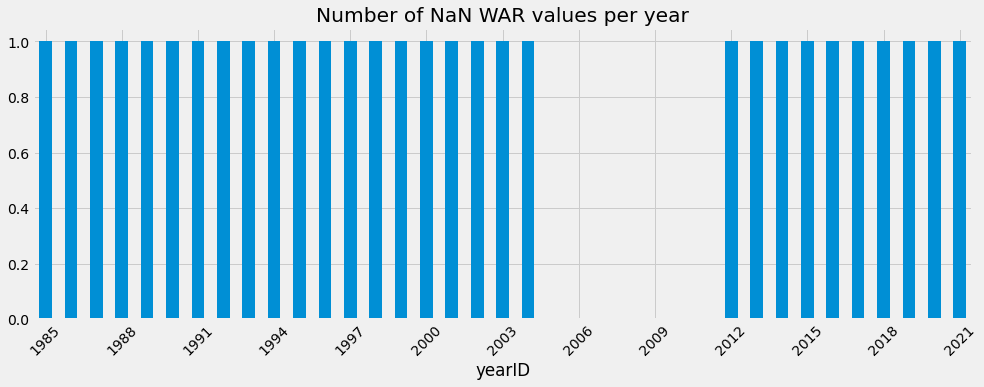

In [129]:
# Plot number of NaN WAR values per year
team_war.groupby("yearID")["WAR_total"].apply(lambda x: x.isna().sum()).plot(kind="bar", figsize=(15,5))
plt.title("Number of NaN WAR values per year")
# Set style to fivethirtyeight
plt.style.use('fivethirtyeight')
# Make x-axis readable
plt.xticks(rotation=45)
# Show only 15 x-ticks
plt.locator_params(axis='x', nbins=15)
plt.show()

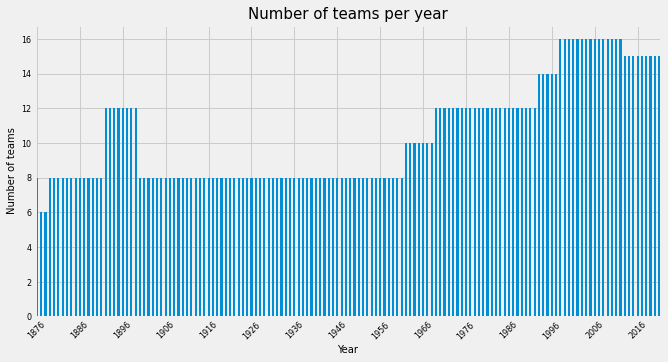

In [71]:
### Plot the number of teams per year ###
# Set plot size
plt.figure(figsize=(10,5))
# Plot value_counts(yearID) as a bar plot and sort by yearID
team_war.value_counts("yearID").sort_index().plot(kind="bar")
# Set style to fivethirtyeight
plt.style.use('fivethirtyeight')
# Make x-axis readable
plt.xticks(rotation=45)
# Show only 15 x-ticks
plt.locator_params(axis='x', nbins=15)
# Add a title
plt.title("Number of teams per year", fontsize=15)
# Add y-label
plt.ylabel("Number of teams", fontsize=10)
# Add x-label
plt.xlabel("Year", fontsize=10)
# x-axis ticks fontsize
plt.xticks(fontsize=8)
# y-axis ticks fontsize
plt.yticks(fontsize=8)
# Show the plot
#plt.show()

# Write the plot to a file
plt.savefig("viz/number_of_teams_per_year.png")